References for this notebook
https://www.datacamp.com/tutorial/pandas-read-csv
https://stackoverflow.com/questions/65297366/only-return-rows-from-a-dataframe-which-match-criteria-in-two-columns
https://www.statology.org/pandas-remove-characters-from-string/



Projected Birthrate workbook.
This workbook contains the week 1 excercise for Programming for Data Analytics: Projected Birthrate using data from the CSO website. 
Andrew has presented the data as a CSV file available on his Github account. 

Initially i had cloned this repositry to my owm machine location and was using that location to import the CSV file into the Jupyter notebook, but i quickly recognised there were a number of flaws with this stratagey:
1. This would mean the code would only run on my local machine - not usable from any other machine, including the person assessing the code for marking. 
2. Security risk: There is a security risk associated with sharing system informaton such as filepaths used on your machine, as this may be used by bad actors to learn about system vulnrabilities, that may increase your exposure to risk of an attack - especially as this code will be shared on a public Github account 



In [187]:
import os
import pandas as pd

# Define which columns to import from the CSV file
usecolsbirths = ["Year", "VALUE"]
usecolspopulation = ["Single Year of Age", "Administrative Counties", "VALUE"]
# note i have used the index_col function to force the Year column to be the first column 


# Method for Import the data directly from the raw github file location on the internet. 
# N.b. This code reads data from Andrew's github location, this data will be refreshed with any updates when the code is executed. (this 'pulls' the data from github every time the code is executed) 

projected_births_url = 'https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/projectedbirths-cso.csv'
population_by_age_url = 'https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/cso-populationbyage.csv'

df_projected_births = pd.read_csv('https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/projectedbirths-cso.csv', index_col = "Year", usecols = usecolsbirths)
df_population_by_age = pd.read_csv('https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/code/data/cso-populationbyage.csv', usecols = usecolspopulation)

# Filter out everything that is not the full country, and remove the 'All ages' listing. 
df_filtered_population_by_age = df_population_by_age[(df_population_by_age['Administrative Counties'] =="Ireland") & (df_population_by_age['Single Year of Age'] !="All ages")]


# Clean up the age column to only display integer values
replace_values = {'Under 1 year':0, '1 year': 1, '100 years and over' :100} # change descriptions to values
df_filtered_population_by_age = df_filtered_population_by_age.replace({"Single Year of Age": replace_values})

# convert non-numbers into numbers
df_filtered_population_by_age['Single Year of Age'] = pd.to_numeric(df_filtered_population_by_age['Single Year of Age'].astype(str).str.extract('(\d+)', expand=False), errors='coerce') 

# Remove the ' years' from the single year of age column
df_new_population_by_age = df_filtered_population_by_age['Single Year of Age'].str.replace(' years', '', regex=True)
#df_new2_population_by_age = df_new_population_by_age['Single Year of Age'].str.replace('1 year', '1', regex=True)

#df_new_population_by_age['Single Year of Age'].apply(lambda x: x.split(' ')[0])
#pd.set_option('display.max_rows', None)  # show all rows of dataframe

print(df_new_population_by_age)

<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
C:\Users\catha\AppData\Local\Temp\ipykernel_25844\826712350.py:28: SyntaxWarning: invalid escape sequence '\d'
  df_filtered_population_by_age['Single Year of Age'] = pd.to_numeric(df_filtered_population_by_age['Single Year of Age'].astype(str).str.extract('(\d+)', expand=False), errors='coerce')
C:\Users\catha\AppData\Local\Temp\ipykernel_25844\826712350.py:28: SyntaxWarning: invalid escape sequence '\d'
  df_filtered_population_by_age['Single Year of Age'] = pd.to_numeric(df_filtered_population_by_age['Single Year of Age'].astype(str).str.extract('(\d+)', expand=False), errors='coerce')


AttributeError: Can only use .str accessor with string values!

Import MatplotLib and define a plot to display the data


TypeError: no numeric data to plot

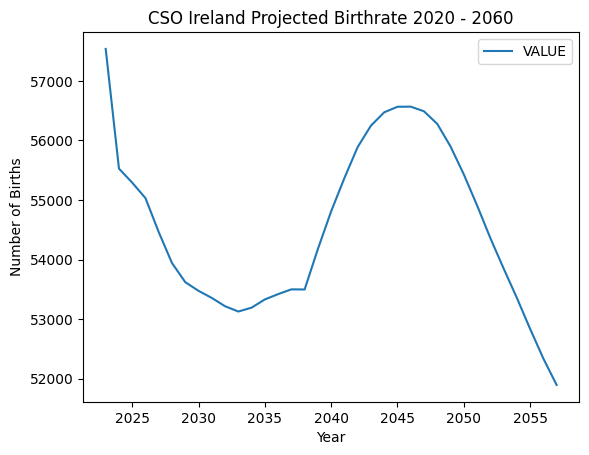

In [185]:
import matplotlib.pyplot as plt

df_projected_births.plot()
plt.title("CSO Ireland Projected Birthrate 2020 - 2060")
plt.ylabel("Number of Births")

df_new_population_by_age.plot()

# Adding text without box on the plot.
plt.show()